<a href="https://colab.research.google.com/github/yeonmi02/mlproject/blob/main/data_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

traffic_2 = pd.read_csv('/content/drive/MyDrive/TrafficTwoMonth.csv')
traffic_2.head(10)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
5,1:15:00 AM,10,Tuesday,15,1,1,39,56,normal
6,1:30:00 AM,10,Tuesday,14,2,2,27,45,normal
7,1:45:00 AM,10,Tuesday,13,2,1,20,36,normal
8,2:00:00 AM,10,Tuesday,7,0,0,26,33,normal
9,2:15:00 AM,10,Tuesday,13,0,0,34,47,normal


#데이터 전처리

In [2]:
import numpy as np

# 시간 데이터를 데이트타임으로 변환
traffic_2['Datetime'] = pd.to_datetime(traffic_2['Date'].astype(str) + ' ' + traffic_2['Time'], format='%d %I:%M:%S %p', errors='coerce')

In [3]:
# 필요하지 않은 특성 제거
traffic_2.drop(columns=['Time', 'Date'], inplace=True)

In [4]:
# 범주형 변수를 인코딩
traffic_2['Day of the week'] = traffic_2['Day of the week'].astype('category')
traffic_2['Traffic Situation'] = traffic_2['Traffic Situation'].astype('category')

In [5]:
# 원-핫 인코딩
traffic_2 = pd.get_dummies(traffic_2, columns=['Day of the week', 'Traffic Situation'])

In [6]:
# 결측치 처리
traffic_2 = traffic_2.dropna(subset=['Datetime'])

In [7]:
# 특성 정리
cols = ['Datetime'] + [col for col in traffic_2.columns if col != 'Datetime']
traffic_2 = traffic_2[cols]

In [8]:
# 저장하고 확인
traffic_2.to_csv('/content/ProcessedTraffic.csv', index=False)
traffic_2.head()

,Datetime,CarCount,BikeCount,BusCount,TruckCount,Total,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,Traffic Situation_heavy,Traffic Situation_high,Traffic Situation_low,Traffic Situation_normal
0,1900-01-10 00:00:00,13,2,2,24,41,False,False,False,False,False,True,False,False,False,False,True
1,1900-01-10 00:15:00,14,1,1,36,52,False,False,False,False,False,True,False,False,False,False,True
2,1900-01-10 00:30:00,10,2,2,32,46,False,False,False,False,False,True,False,False,False,False,True
3,1900-01-10 00:45:00,10,2,2,36,50,False,False,False,False,False,True,False,False,False,False,True
4,1900-01-10 01:00:00,11,2,1,34,48,False,False,False,False,False,True,False,False,False,False,True


In [9]:
# 수치형 특성 확인하기
numeric_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

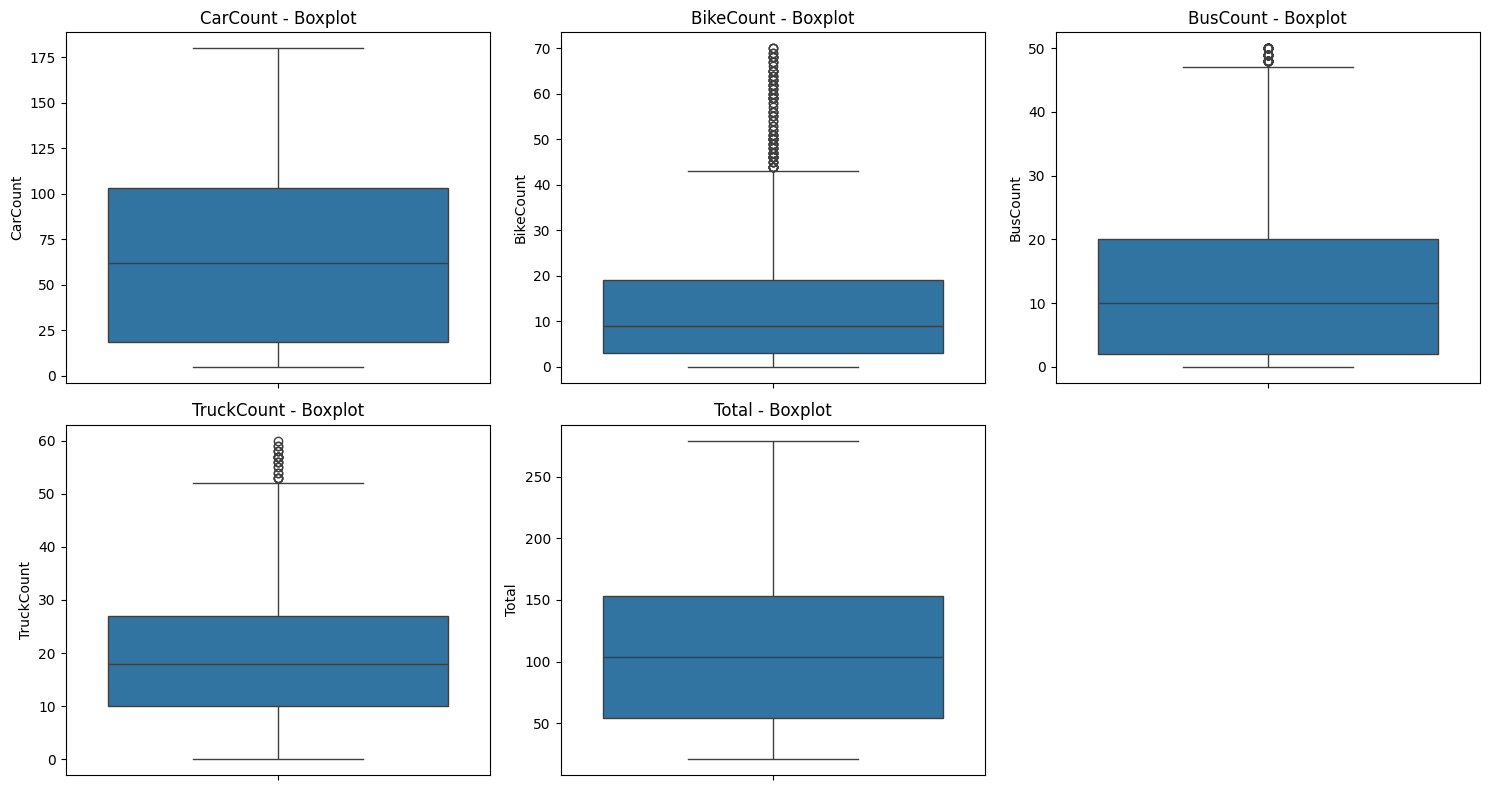

In [10]:
# 이상치 탐지
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=traffic_2[col])
    plt.title(f'{col} - Boxplot')
plt.tight_layout()
plt.show()

In [11]:
traffic_2['Datetime'] = pd.to_datetime(traffic_2['Datetime'])
traffic_2.set_index('Datetime', inplace=True)

In [12]:
numeric_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
traffic_2_num = traffic_2[numeric_cols].resample('30T').mean()

<ipython-input-12-2b676e985bee>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  traffic_2_num = traffic_2[numeric_cols].resample('30T').mean()


In [13]:
print(traffic_2.columns.tolist())

['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Day of the week_Friday', 'Day of the week_Monday', 'Day of the week_Saturday', 'Day of the week_Sunday', 'Day of the week_Thursday', 'Day of the week_Tuesday', 'Day of the week_Wednesday', 'Traffic Situation_heavy', 'Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal']


In [14]:
categorical_cols = [ 'Day of the week_Friday', 'Day of the week_Monday', 'Day of the week_Saturday', 'Day of the week_Sunday', 'Day of the week_Thursday', 'Day of the week_Tuesday', 'Day of the week_Wednesday', 'Traffic Situation_heavy', 'Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal']
def mode_agg(x):
    return x.mode()[0] if not x.mode().empty else np.nan
traffic_2_cat = traffic_2[categorical_cols].resample('30T').agg(mode_agg)

<ipython-input-14-139bc3a2e256>:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  traffic_2_cat = traffic_2[categorical_cols].resample('30T').agg(mode_agg)


In [15]:
traffic_2_30min = pd.concat([traffic_2_num, traffic_2_cat], axis=1).reset_index()

In [16]:
print(traffic_2_30min.head(10))

             Datetime  CarCount  BikeCount  BusCount  TruckCount   Total  \
0 1900-01-01 00:00:00     13.75       2.00      0.25       31.50   47.50   
1 1900-01-01 00:30:00     15.50       1.75      0.75       25.25   43.25   
2 1900-01-01 01:00:00     11.50       1.50      0.50       29.25   42.75   
3 1900-01-01 01:30:00     15.25       1.75      1.00       19.75   37.75   
4 1900-01-01 02:00:00     13.00       2.00      0.50       27.25   42.75   
5 1900-01-01 02:30:00      9.50       0.50      0.50       29.50   40.00   
6 1900-01-01 03:00:00     13.75       2.75      1.00       31.25   48.75   
7 1900-01-01 03:30:00     13.00       2.00      0.50       25.00   40.50   
8 1900-01-01 04:00:00     57.50       8.50      3.00       12.00   81.00   
9 1900-01-01 04:30:00     75.75      13.25      4.00       21.75  114.75   

   Day of the week_Friday  Day of the week_Monday  Day of the week_Saturday  \
0                   False                   False                     False   
1    

In [17]:
print(traffic_2_30min['Datetime'].diff().value_counts())

Datetime
0 days 00:30:00    1487
Name: count, dtype: int64


In [18]:
print(f"원본 데이터 개수: {len(traffic_2)}")
print(f"30분 단위 데이터 개수: {len(traffic_2_30min)}")

원본 데이터 개수: 5952
30분 단위 데이터 개수: 1488


In [24]:
plt.figure(figsize=(14, 6))
vehicle_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

<Figure size 1400x600 with 0 Axes>

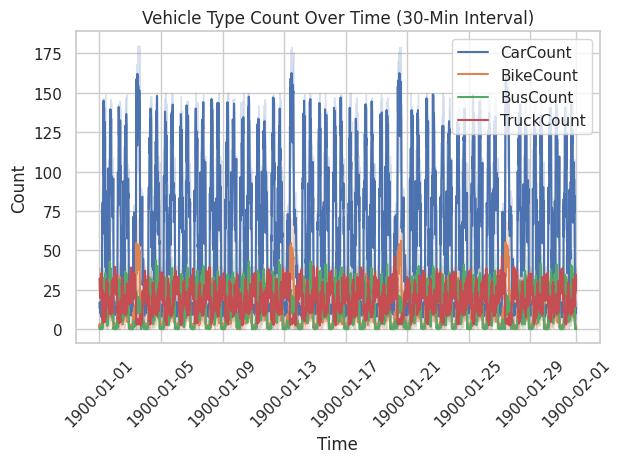

In [28]:
for col in vehicle_cols:
    sns.lineplot(data=traffic_2, x='Datetime', y=col, label=col)

plt.title('Vehicle Type Count Over Time (30-Min Interval)')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

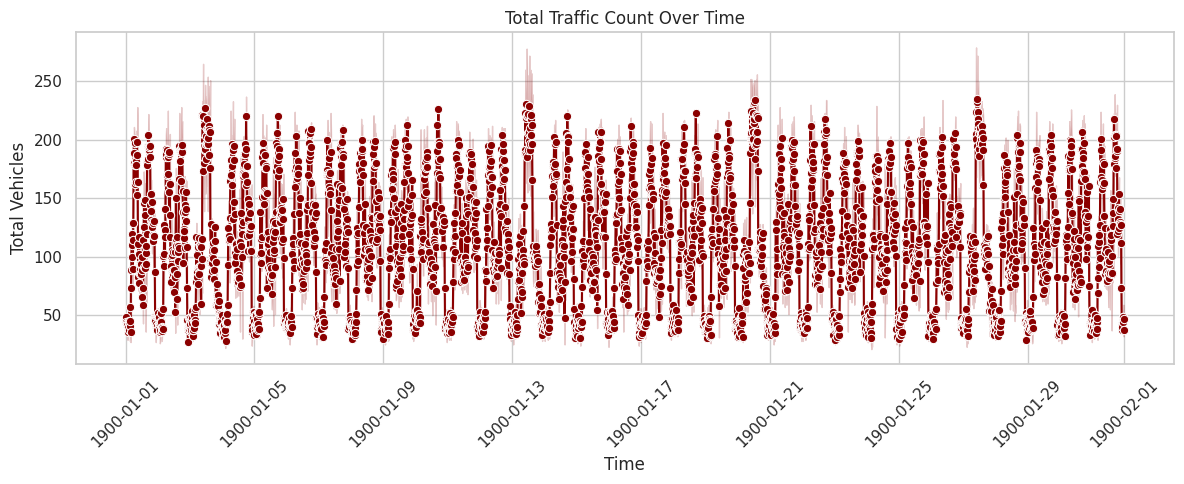

In [27]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=traffic_2, x='Datetime', y='Total', color='darkred', marker='o')
plt.title('Total Traffic Count Over Time')
plt.xlabel('Time')
plt.ylabel('Total Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-29-3eee7d3076a0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=traffic_2, x='weekday', y='Total', estimator='mean', order=[


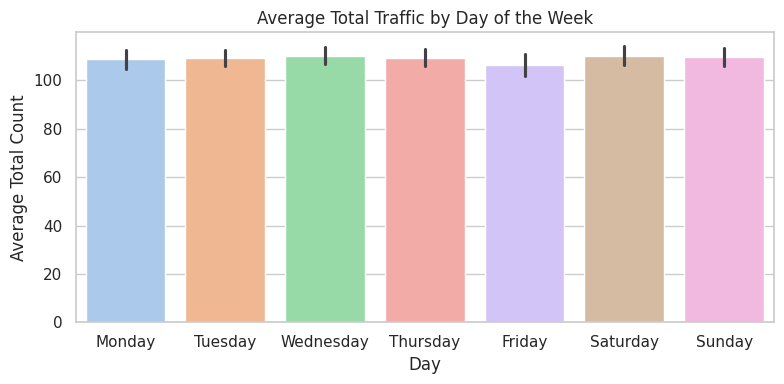

In [29]:
weekday_cols = [
    'Day of the week_Monday', 'Day of the week_Tuesday', 'Day of the week_Wednesday',
    'Day of the week_Thursday', 'Day of the week_Friday',
    'Day of the week_Saturday', 'Day of the week_Sunday'
]

traffic_2['weekday'] = traffic_2[weekday_cols].idxmax(axis=1).str.replace('Day of the week_', '')

plt.figure(figsize=(8, 4))
sns.barplot(data=traffic_2, x='weekday', y='Total', estimator='mean', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], palette='pastel')
plt.title('Average Total Traffic by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Total Count')
plt.tight_layout()
plt.show()

<ipython-input-30-332f1d1357b4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=traffic_2, x='traffic_level', y='Total', palette='Set2',


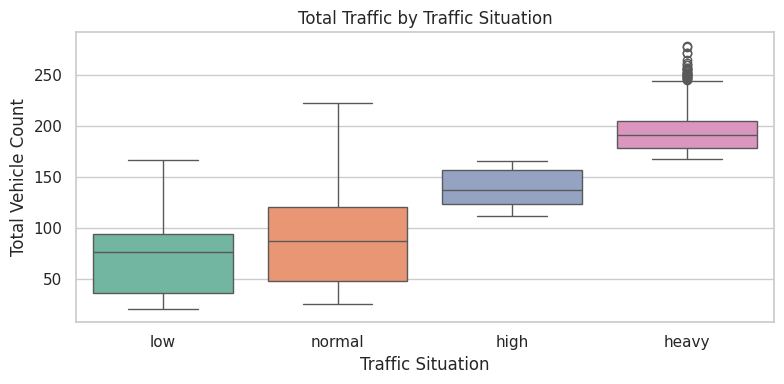

In [30]:
traffic_cols = [
    'Traffic Situation_low', 'Traffic Situation_normal',
    'Traffic Situation_high', 'Traffic Situation_heavy'
]

traffic_2['traffic_level'] = traffic_2[traffic_cols].idxmax(axis=1).str.replace('Traffic Situation_', '')

plt.figure(figsize=(8, 4))
sns.boxplot(data=traffic_2, x='traffic_level', y='Total', palette='Set2',
            order=['low', 'normal', 'high', 'heavy'])
plt.title('Total Traffic by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Total Vehicle Count')
plt.tight_layout()
plt.show()